In [ ]:
import numpy as np
import pandas as pd

# Introduction to Exploratory Data Analysis
In this notebook, we will learn one of the most important steps of the Data Science pipeline -  Exploratory Data Analysis.

## **Exploratory Data Analysis (EDA):** 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

In short, it summarizes the main characteristics of a dataset.

## About the Dataset:
The dataset we will be using here is the [Resume data](https://archive.ics.uci.edu/ml/datasets/wine+quality), containing certain information about candidates' skills, education and field of interest.

This dataset is commonly used for predicting whether a particular CV is of desired category or not.

**Refresher:**

1. Target Variable: 
The target variable or label of a dataset is the feature of a dataset about which you want to gain a deeper understanding. 
It is the variable that is, or should be the output.

 
2. Input Variable: 
One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well."
 
Now what will be the Input and Target variables in the CV classification problem? Let’s have a look:


**Input variable:**

1. Resumes


**Output variable:**

2. Job Category 


---


In this notebook, we'll be performing EDA on CV data.

In [ ]:
import numpy as np   # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd  # Data analysis and manipulation tool
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'C:\Users\hp\Resume\3- Data Preparation\new_data.csv',encoding ='ISO-8859-1')#importing data


In [ ]:
data.head(10)


# ANALYZING DATA VIA VISUALIZATION

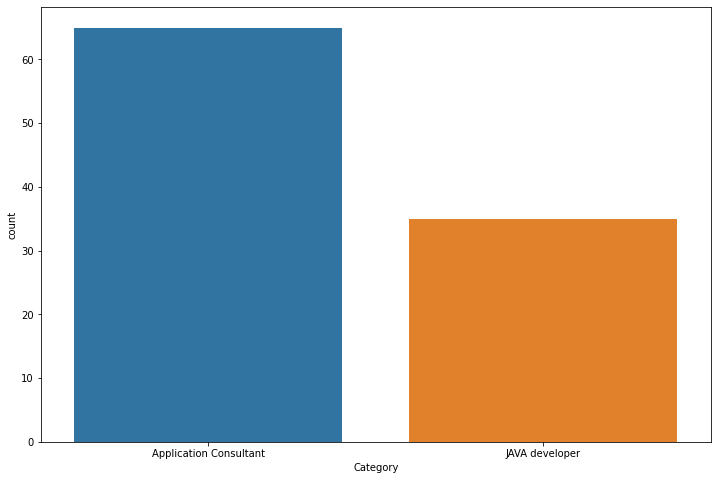

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(data.Category)
plt.savefig('jobcategory_detail_h.png')


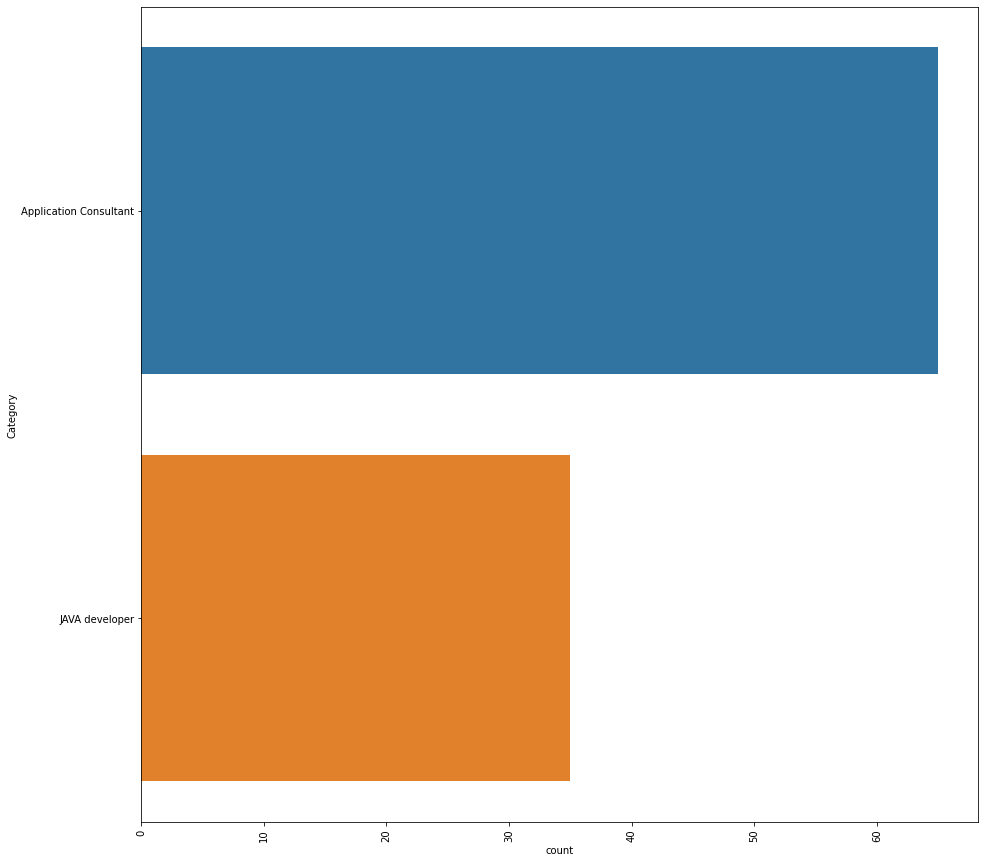

In [53]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)
plt.savefig('jobcategory_detail_v.png')


In [54]:
#Pie-chart
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']


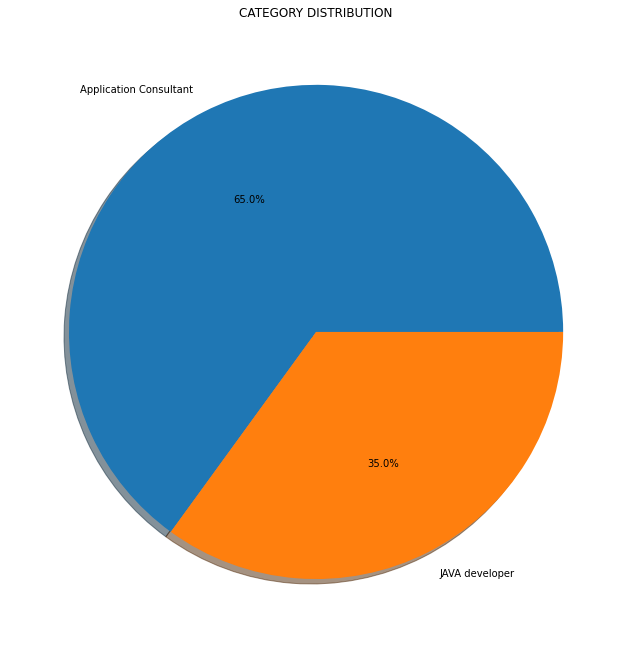

In [55]:
from matplotlib.gridspec import GridSpec
from scipy.sparse import hstack
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )
plt.savefig('category_dist.png')


In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [57]:
from sklearn.preprocessing import LabelEncoder
le_1 = LabelEncoder()
data['Category']=le_1.fit_transform(data['Category'])


In [58]:
data

,Category,Resumes
0,0,samama hill view block gulistanejauhar karac...
1,1,contactykphotmailcomwwwlinkedincominmuhammadmu...
2,0,a experience worked on several projects majo...
3,0,\nArsalan Alam Siddiqui \n\nComplete curren...
4,0,Contactstd_20585@iobm.edu.pkwww.linkedin.com/i...
...,...,...
95,1,contactwwwlinkedincominconnectwithmahmed linke...
96,0,Contact\nwww.linkedin.com/in/muhammad-irfan-17...
97,0,contactwwwlinkedincominmuhammadhunainkhan link...
98,0,contactwwwlinkedincominehsanmasiha linkedintop...


# Displaying Histogram 0 for Application Consultant & 1 for JAVA Developer

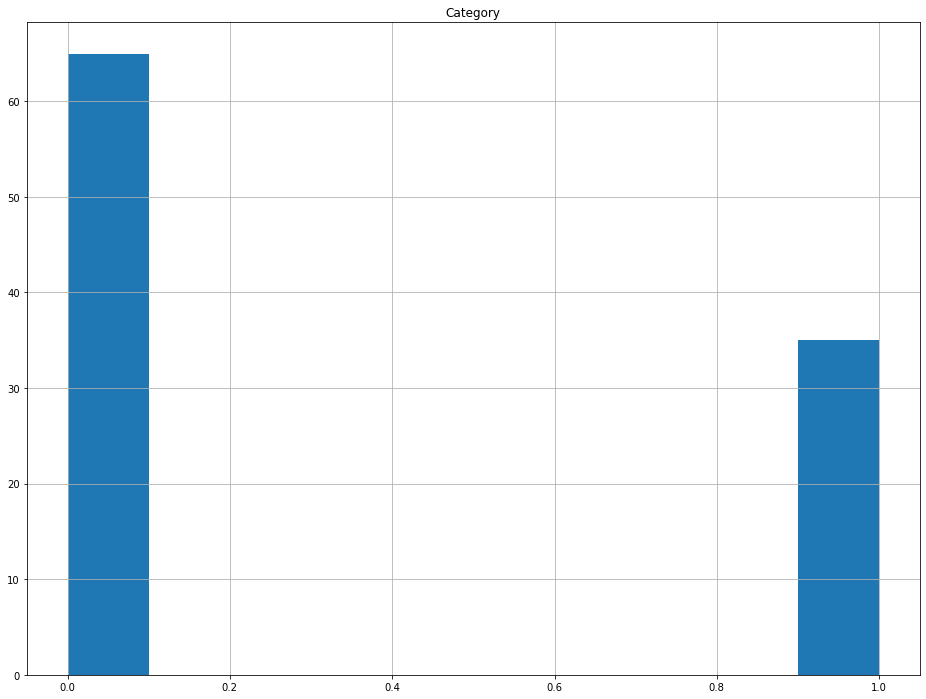

In [62]:
data.hist(bins=10, figsize=(16,12))
plt.show()

# Analyzing Co relations using heatmaps

In [63]:
data.corr()

,Category
Category,1.0


<AxesSubplot:>

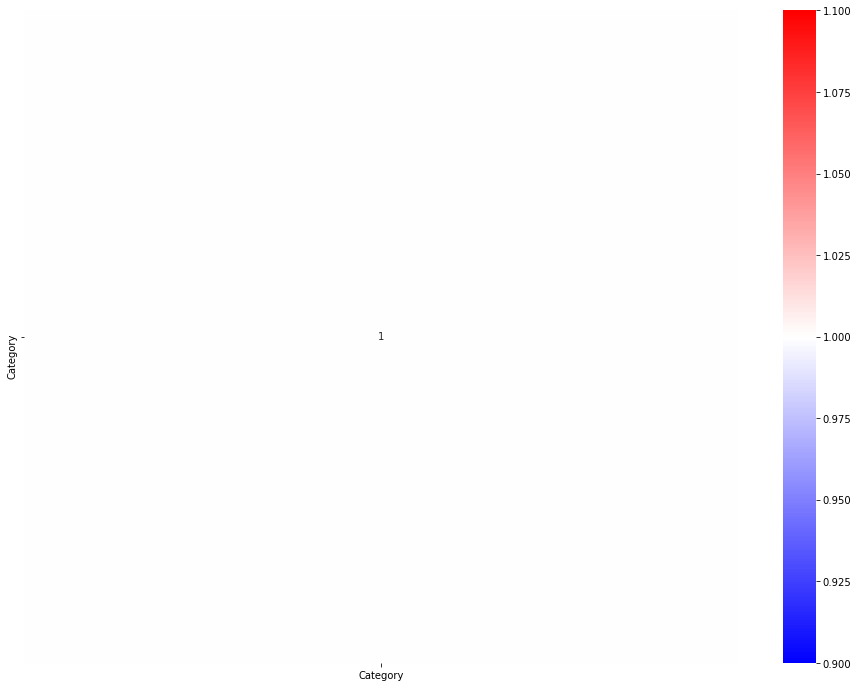

In [64]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

In [65]:
import re
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
le.fit(["Application Consultant","JAVA developer"])

LabelEncoder()

In [66]:
def cleanResume(resumeText):
    resumeText = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(resumeText))
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
data['cleaned_resume'] = data.Resumes.apply(lambda x: cleanResume(x))


In [67]:
data

,Category,Resumes,cleaned_resume
0,0,samama hill view block gulistanejauhar karac...,amama hill view block guli tanejauhar karac...
1,1,contactykphotmailcomwwwlinkedincominmuhammadmu...,contact kphotmailcomwwwlinkedincominmuhammadmu...
2,0,a experience worked on several projects majo...,a experience worked on everal project majo...
3,0,\nArsalan Alam Siddiqui \n\nComplete curren...,Ar alan Alam Siddiqui Complete current R...
4,0,Contactstd_20585@iobm.edu.pkwww.linkedin.com/i...,Contact td iobm edu pkwww linkedin com i...
...,...,...,...
95,1,contactwwwlinkedincominconnectwithmahmed linke...,contactwwwlinkedincominconnectwithmahmed linke...
96,0,Contact\nwww.linkedin.com/in/muhammad-irfan-17...,Contact www linkedin com in muhammad irfan a...
97,0,contactwwwlinkedincominmuhammadhunainkhan link...,contactwwwlinkedincominmuhammadhunainkhan link...
98,0,contactwwwlinkedincominehsanmasiha linkedintop...,contactwwwlinkedincomineh anma iha linkedintop...


In [ ]:
data.to_csv('target_cv.csv') # Saving the csv file for model building